<a href="https://colab.research.google.com/github/dsmohiit/Apna_Klub_Assignment/blob/main/Apna_Klub_Assingment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv("/content/apnaklub_data_2 (1) - apnaklub_data_2 (1).csv")

In [57]:
#Reading top 5 rows of dataset.
df.head()

,Unnamed: 0,user_id,order_date,order_id,sku_id,warehouse_name,quantity,placed_gmv
0,0,868733,2022-09-16,262052,2567941,USA,1,331.60
1,1,868733,2022-09-16,262052,434572f,USA,1,416.52
2,2,868733,2022-09-16,262052,8ae8fa4,USA,2,45.00
3,3,868733,2022-09-16,262052,c9932dc,USA,3,67.50
4,4,868733,2022-09-16,262052,35c7c3b,USA,1,340.71


In [58]:
#Reading last 5 rows of dataset.
df.tail()

,Unnamed: 0,user_id,order_date,order_id,sku_id,warehouse_name,quantity,placed_gmv
129995,129995,40296be,2023-09-18,884793,86d58fc,United Kingdom,1,166.0
129996,129996,40296be,2023-09-18,884793,bc08c84,United Kingdom,1,201.6
129997,129997,dd09282,2023-09-18,885039,806da04,United Kingdom,1,102.0
129998,129998,dd09282,2023-09-18,885039,437d2ac,United Kingdom,1,204.0
129999,129999,dd09282,2023-09-18,885039,30b7ede,United Kingdom,1,304.2


In [59]:
#Dropping the column "Unnamed: 0"
df = df.drop("Unnamed: 0", axis= 1)

In [60]:
df

,user_id,order_date,order_id,sku_id,warehouse_name,quantity,placed_gmv
0,868733,2022-09-16,262052,2567941,USA,1,331.60
1,868733,2022-09-16,262052,434572f,USA,1,416.52
2,868733,2022-09-16,262052,8ae8fa4,USA,2,45.00
3,868733,2022-09-16,262052,c9932dc,USA,3,67.50
4,868733,2022-09-16,262052,35c7c3b,USA,1,340.71
...,...,...,...,...,...,...,...
129995,40296be,2023-09-18,884793,86d58fc,United Kingdom,1,166.00
129996,40296be,2023-09-18,884793,bc08c84,United Kingdom,1,201.60
129997,dd09282,2023-09-18,885039,806da04,United Kingdom,1,102.00
129998,dd09282,2023-09-18,885039,437d2ac,United Kingdom,1,204.00


In [61]:
#Shape of dataset.
df.shape

(130000, 7)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130000 entries, 0 to 129999
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         130000 non-null  object 
 1   order_date      130000 non-null  object 
 2   order_id        130000 non-null  int64  
 3   sku_id          130000 non-null  object 
 4   warehouse_name  130000 non-null  object 
 5   quantity        130000 non-null  int64  
 6   placed_gmv      130000 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 6.9+ MB


In [63]:
#Converting "order_date" into date-time data type.
df["order_date"] = pd.to_datetime(df["order_date"])

In [64]:
#Checking for "NULL" values.
df.isna().sum()

,0
user_id,0
order_date,0
order_id,0
sku_id,0
warehouse_name,0
quantity,0
placed_gmv,0


In [65]:
#Describing the numcerical columns.
df[["quantity", "placed_gmv"]].describe()

,quantity,placed_gmv
count,130000.000000,130000.000000
mean,1.591008,1336.445672
std,1.854480,2735.577056
min,1.000000,4.200000
25%,1.000000,371.500000
50%,1.000000,591.900000
75%,2.000000,1310.490000
max,137.000000,216814.080000


In [66]:
#Number of distinct/unique customers/users_id.
df["user_id"].nunique()

3659

In [67]:
#Number of distinct/unique products/sku_id.
df["sku_id"].nunique()

2488

In [68]:
#Sales trend.
sales_trend = df.groupby("order_date")["placed_gmv"].sum().reset_index()
sales_trend

,order_date,placed_gmv
0,2022-09-01,596416.52
1,2022-09-02,675390.60
2,2022-09-03,634700.21
3,2022-09-04,173903.04
4,2022-09-05,635293.44
...,...,...
109,2023-11-18,1570027.03
110,2023-11-19,703866.58
111,2023-11-20,1919614.26
112,2023-11-22,4629566.36


In [69]:
#Adding "month" column.
sales_trend["month"] = sales_trend["order_date"].dt.month
sales_trend

,order_date,placed_gmv,month
0,2022-09-01,596416.52,9
1,2022-09-02,675390.60,9
2,2022-09-03,634700.21,9
3,2022-09-04,173903.04,9
4,2022-09-05,635293.44,9
...,...,...,...
109,2023-11-18,1570027.03,11
110,2023-11-19,703866.58,11
111,2023-11-20,1919614.26,11
112,2023-11-22,4629566.36,11


In [70]:
#Adding "year" column.
sales_trend["year"] = sales_trend["order_date"].dt.year
sales_trend

,order_date,placed_gmv,month,year
0,2022-09-01,596416.52,9,2022
1,2022-09-02,675390.60,9,2022
2,2022-09-03,634700.21,9,2022
3,2022-09-04,173903.04,9,2022
4,2022-09-05,635293.44,9,2022
...,...,...,...,...
109,2023-11-18,1570027.03,11,2023
110,2023-11-19,703866.58,11,2023
111,2023-11-20,1919614.26,11,2023
112,2023-11-22,4629566.36,11,2023


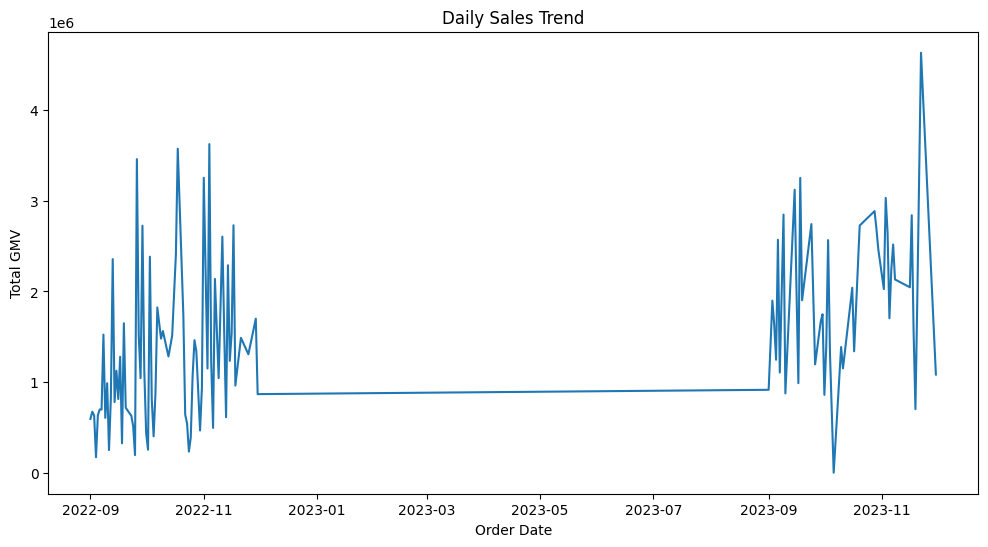

In [71]:
#Analysing daily sales trend.
plt.figure(figsize= (12, 6))
plt.plot(sales_trend["order_date"], sales_trend["placed_gmv"])
plt.title("Daily Sales Trend")
plt.xlabel("Order Date")
plt.ylabel("Total GMV")
plt.show()

In [83]:
#Product Analysis - Identifying top 10 selling products.
top_selling_sku = df.groupby("sku_id")["quantity"].sum().reset_index().sort_values(by= "quantity", ascending= False)

top_selling_sku.head(10)

,sku_id,quantity
1656,aa61eaa,2187
925,5c7951f,2108
1863,bd7c360,1525
877,5778589,1504
1455,934276,1492
1362,8a9517a,1486
1200,77ea1be,1134
948,5ef89e9,1066
2,0072cca,1001
2109,d71a9ac,994


In [80]:
#Warehouse Performance.
warehouse_performance = df.groupby("warehouse_name").agg({
    "order_id": "count",
    "quantity": "sum",
    "placed_gmv": "sum"
}).reset_index().sort_values(by= "placed_gmv", ascending= False)

warehouse_performance

,warehouse_name,order_id,quantity,placed_gmv
1,USA,48569,76546,66248696.45
2,United Kingdom,44158,67742,54423087.40
0,India,37273,62543,53066153.46


In [82]:
#Customer Analysis - Identifying top 10 customers.
customer = df.groupby("user_id").agg({
    "quantity": "sum",
    "placed_gmv": "sum"
}).reset_index().sort_values(by= "placed_gmv", ascending= False)

customer

,user_id,quantity,placed_gmv
1877,864cd3a,544,1332258.05
2709,bdc234c,1045,1184905.64
842,3d890d3,660,1088147.31
3112,d99ddb8,1498,1077321.58
3486,f3c7b62,383,1063854.26
...,...,...,...
2279,a168f63,2,570.48
1843,83f0644,2,570.20
3059,d5b8121,1,519.65
2364,a740dd2,1,408.78
